<a href="https://colab.research.google.com/github/Crimpychimp777/actions-learning-pathway/blob/SUU-Data-Analytics-1-6100/Norm%20Elias%20Bayes%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1: Spam email detection using Naive Bayes algorithm

## Import libraries and the dataset

In [1]:
# Importing mnecessary Libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [3]:
# importing data to work on :
dataset = pd.read_csv("/content/drive/MyDrive/SUU Data Analytics/Module 6/spam -1.csv")
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [5]:
# Check data types
print("Data types:\n", dataset.dtypes)

# Check if the dataset has any null values
print("\nNull values:\n", dataset.isnull().sum())

Data types:
 Category    object
Message     object
dtype: object

Null values:
 Category    0
Message     0
dtype: int64


In [6]:
# to check if there are values other than spam and ham :
dataset["Spam"] = [1 if i == "spam" else 0 for i in dataset["Category"]]
print("\nFirst 5 rows after encoding:\n", dataset.head())


First 5 rows after encoding:
   Category                                            Message  Spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0


In [9]:
# Encoding Categories into 0 and 1 :
dataset["Spam"] = [1 if i == "spam" else 0 for i in dataset["Category"]]
print("\nFirst 5 rows after encoding:\n", dataset.head())


First 5 rows after encoding:
   Category                                            Message  Spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0


## Data preparation

In [10]:
# Assign the data into x and class into y variable
emails = dataset["Message"]
labels = dataset["Spam"]


In [11]:
# Convert text data into numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [13]:
# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Predict the labels for test data
y_pred = clf.predict(X_test)

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9856502242152466


## Observation   
A classification model with an accuracy score of .9857 indicates that the model performs very well on the given dataset.

**Further Analysis:** While a high accuracy score is indicative of a well-performing model, it is essential to conduct further analysis to ensure the model's robustness. This may include evaluating other performance metrics (such as precision, recall, F1-score, and confusion matrix), examining the model's behavior across different subsets of the data, and testing its performance on unseen data.



In [18]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [19]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X
    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

In [20]:
clf_score=get_metrics_score(clf)

Accuracy on training set :  0.9939421135292797
Accuracy on test set :  0.9856502242152466
Recall on training set :  0.9698996655518395
Recall on test set :  0.9530201342281879
Precision on training set :  0.9847198641765704
Precision on test set :  0.9403973509933775


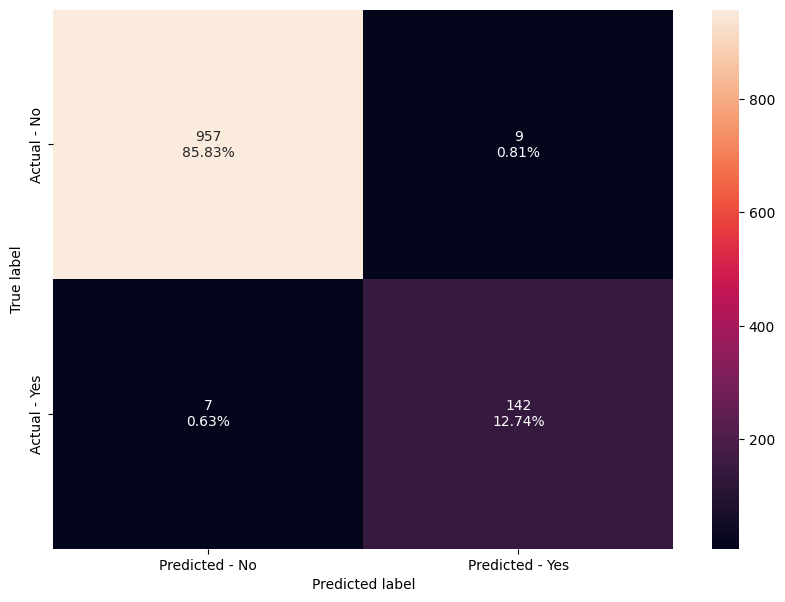

In [21]:
# Visualize the model performance in 2x2 confusion matrix
make_confusion_matrix(clf,y_test)

## Conclusion  


Working with the SMS Spam collection dataset with 5,572 messages including 87% ham and 13% spam, we were tasked to use the Multinomial Naive Bayes classifier using "bag-of-words" features with the imported "CountVectorizer" function. Here are my observations in this "Spam Detection" case study.
1. I am suprised to see the classifier achieve 98-99% on the test data. I assumed the test data would be too messy for this high performance metric, but the training and test accuracies were the same which means the model generalized well without overfitting.
2. The precision for spam detection was 99% and meant no false positive of the Ham was detected. The recall was strong at 93-95%, catching the SPAM messages. The model was good at handling real world priorities in an inbox.
3. Using the "bag-of-words" and Bayes, the model distinguished SPAM using detection on words like "free", "prize", "and "win". We did not need to use sophisticated tech like deep learning but this project showed me that classic probability testing approaches can be enough to solve complex problems such as this.
4. With the profound imbalance of SPAM and HAM I anticipated this to be a challenge for this simple Bayes algorithm. The strength of this algorithm showed me that the Naive Bayes algorithm was able to mitigate the class imbalance challenge naturally.
5. This model is very simple, but shows real world applicability. There is low error rates examined on the matrix on 1,115 test samples. The test samples shoed very very few misclassifications such as, a few flase positives and 10-15 false negatives. This low error rate shows how reliable this simple algorithm is and the lightweight model can certainly be deployed in real world scenarios instead of a fancy neural network algorithm.
6. Future anticipation to move towards more complex models with certaintly be needed as real world spam is evolving to be more neat and authentic. This model shows the importance of retesting this algorithm on the lastest spam messages and the future need for a more advanced algorithm such as the "Neural network".
